In [21]:
import numpy as np # array operations
import cv2 #opencv library read img operations
# data visualisation and manipulation
import matplotlib.pyplot as plt #show img and table
import math
from pathlib import Path # 去掉副檔名

In [22]:
# 加密
def embedding(n:int,digit_ary:int,cover_img:np.ndarray,secret_digit:int):
    #digit_ary=2*n+1
    f=0
    for i in range(n):
        f+=cover_img[i]*(i+1)
    f=f % digit_ary
    s=(secret_digit-f) % digit_ary
    if(s!=0):#s=0 不用變動
        if(s<=n):
            cover_img[s-1]=cover_img[s-1]+1
            if(cover_img[s-1]>255 or cover_img[s-1]<0):
                if(cover_img[s-1]>255):
                    cover_img[s-1]=cover_img[s-1]-2
                else:
                    cover_img[s-1]=cover_img[s-1]+2
                embedding(n=n,digit_ary=digit_ary,cover_img=cover_img,secret_digit=secret_digit)
        else:
            change_index=digit_ary-s-1
            cover_img[change_index]=cover_img[change_index]-1
            if(cover_img[change_index]>255 or cover_img[change_index]<0):
                if(cover_img[change_index]>255):
                    cover_img[change_index]=cover_img[change_index]-2
                else:
                    cover_img[change_index]=cover_img[change_index]+2
                embedding(n=n,digit_ary=digit_ary,cover_img=cover_img,secret_digit=secret_digit)
        
    return cover_img
# embedding(n=4,digit_ary=9,cover_img=[14,13,9,4],secret_digit=7)

In [23]:
# 解密
def extraction(n:int,digit_ary:int,cover_img:np.ndarray):
    f=0
    for i in range(n):
        f+=cover_img[i]*(i+1)
    secret_digit=f % digit_ary
    return secret_digit
# extraction(n=4, digit_ary=9,cover_img=[14, 13, 9, 3])

In [24]:
def output_secret_txt(secret_digit:np.ndarray,file_name:str):
    path = 'secret/' + file_name
    f = open(path, 'w', encoding="utf-8")
    for i in range(len(secret_digit)):
        f.write(str('{}{:d}'.format(" ",secret_digit[i])))
    f.close()

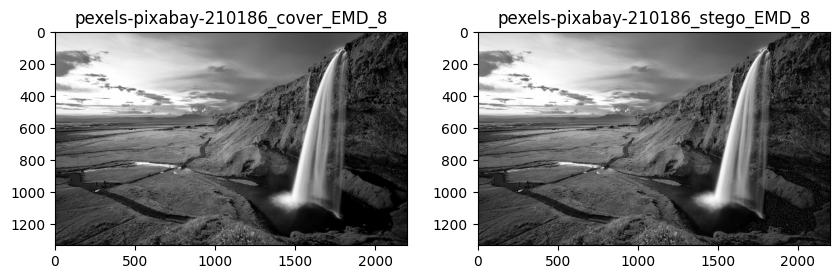

In [25]:
if __name__ == '__main__':
    n=0
    while n<2 or n>10:
        n = input("n≥2, n≤10為正整數 n: number of pixels in a cluster(n):")
        n = int(n)
    img_name = input("Input cover image:")
    # print(n,img_name)

    source_dir="source/"
    # cover imgPath
    imgPath = source_dir + img_name
    # convert img to array 以灰階格式讀取(二維)
    cover_gray = cv2.imread(imgPath ,cv2.IMREAD_GRAYSCALE)  
    # print(cover_gray)

    # 轉為一維
    cover_temp=cover_gray.copy()
    cover_temp=cover_temp.reshape(-1,)
    # print(cover_temp.shape)

    digit_ary=2*n+1
    # pixels 總數: len(cover_temp) / 一組n個 = 組數
    seedSize=math.floor(len(cover_temp)/n)
    # print(seedSize)
    np.random.seed(2022)
    secret_digit=np.random.randint(2*n, size=seedSize)
    secret_file_name=Path(img_name).stem + "_secret_digit_"+ str(n) +".txt"
    output_secret_txt(secret_digit,secret_file_name)

    # 加密
    stego_EMD=cover_temp.copy()
    index=0
    for i in range(seedSize):
        stego_EMD[index:index+n]=embedding(n=n,digit_ary=digit_ary,cover_img=cover_temp[index:index+n],secret_digit=secret_digit[i])
        index+=n

    # 解密
    secret=[]
    index=0
    for i in range(seedSize):
        secret.append(extraction(n=n, digit_ary=digit_ary,cover_img=stego_EMD[index:index+n]))
        index+=n
    # print("extract secret: ",secret)

    # 轉回二維
    stego_EMD=stego_EMD.reshape(cover_gray.shape,)
    # print(stego_EMD.shape)
    # print(stego_EMD)

    # 存 cover灰階圖 和 stego加密後圖
    cover_dir="cover/"
    cover_name=Path(img_name).stem + "_cover_EMD_"+ str(n) +".png"
    cv2.imwrite(cover_dir + cover_name, cover_gray)

    stego_dir="stego/"
    stego_name=Path(img_name).stem + "_stego_EMD_"+ str(n) +".png"
    cv2.imwrite(stego_dir+stego_name, stego_EMD)

    # 印出未加密灰階圖片
    plt.figure(figsize=(10,10))
    plt.subplot(121)
    plt.title(Path(cover_name).stem)
    plt.imshow(cover_gray,cmap = 'gray')

    # 印出加密圖片
    plt.subplot(122)
    plt.title(Path(stego_name).stem)
    plt.imshow(stego_EMD,cmap = 'gray')
    plt.show()
